In [8]:
from ExoPSI import exopsi
import pandas as pd
import numpy as np

exopsi = exopsi()

#Loading the dataset
df = pd.read_csv(r"phl_exoplanet_catalog.csv") 
print(df)

          P_NAME      P_MASS  P_MASS_ERROR_MIN  P_MASS_ERROR_MAX  P_RADIUS  \
0       11 Com b  6165.86330       -476.742000        476.742000   12.1068   
1       11 UMi b  4684.78480       -794.570010        794.570010   12.2189   
2       14 And b  1525.57440               NaN               NaN   12.8915   
3       14 Her b  2586.74170       -308.970140        492.671540   12.5552   
4     16 Cyg B b   565.73385        -25.426240         25.426240   13.4520   
...          ...         ...               ...               ...       ...   
5215   ups And b   218.53853         -1.398443          1.398443   14.0125   
5216   ups And c  4443.23550      -1684.488400        731.004410   12.3310   
5217   ups And d  3257.73700      -1048.832400        222.479600   12.4431   
5218   ups Leo b   162.09228        -82.635281         19.069680   14.2367   
5219         NaN   889.91841               NaN               NaN   13.2278   

      P_RADIUS_ERROR_MIN  P_RADIUS_ERROR_MAX  P_YEAR P_UPDATED 

In [9]:
#Weight Calculation
upper_lims=[1.9, 1.5,1.4,323]
lower_lims = [0.5, 0.7,0.4,273]
ref_val = [1,1,1,288]
weights = exopsi.calc_weight(ref_val,upper_lims,lower_lims)

The calculated weight(s) is(are): [0.57, 1.07, 0.7, 5.58]


In [11]:
#PSI Calculation
PSI_data = exopsi.calc_psi(df[['P_RADIUS','P_DENSITY','P_ESCAPE','P_TEMP_EQUIL']],upper_lims,lower_lims,ref_val,0.8,
                           surf_param=['P_ESCAPE','P_TEMP_EQUIL'],
                           int_param=['P_RADIUS','P_DENSITY'],
                           p_index=df.loc[:,'P_NAME'])
print(PSI_data)


          P.Name  PSI_P_RADIUS  PSI_P_DENSITY  PSI_P_ESCAPE  PSI_P_TEMP_EQUIL  \
0       11 Com b      0.342463       0.422468      0.177870          0.026904   
1       11 UMi b      0.340805       0.538281      0.195568          0.024231   
2       14 And b      0.331299       0.821171      0.287336          0.033344   
3       14 Her b      0.335959       0.858296      0.240088          0.090788   
4     16 Cyg B b      0.323913       0.352277      0.396995          0.341840   
...          ...           ...            ...           ...               ...   
5215   ups And b      0.316963       0.128696      0.530332          0.002351   
5216   ups And c      0.339168       0.572231      0.199649          0.447786   
5217   ups And d      0.337553       0.727953      0.221919          0.424146   
5218   ups Leo b      0.314296       0.090930      0.578214          0.063256   
5219         NaN      0.326812       0.533029      0.343555          0.018412   

      PSI_Interior  PSI_Sur

c:\Users\raiad\anaconda3\lib\site-packages\ExoPSI\exopsi.py:84: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(data_x, data_y, cmap="viridis")


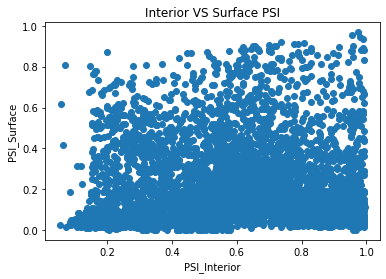

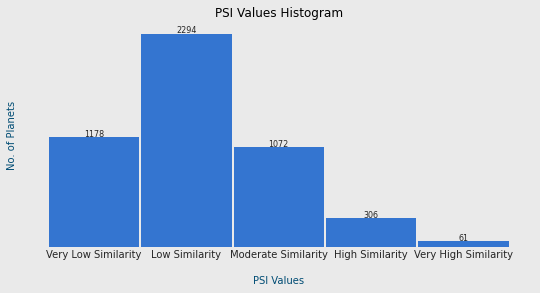

      P_RADIUS_ERROR_MIN in MU  P_RADIUS_ERROR_MAX in MU  P_YEAR in MU
0                          NaN                       NaN   4460.000000
1                          NaN                       NaN   4464.444444
2                          NaN                       NaN   4462.222222
3                          NaN                       NaN   4448.888889
4                          NaN                       NaN   4435.555556
...                        ...                       ...           ...
5215                       NaN                       NaN   4435.555556
5216                       NaN                       NaN   4442.222222
5217                       NaN                       NaN   4442.222222
5218                       NaN                       NaN   4491.111111
5219                       NaN                       NaN   4460.000000

[5220 rows x 3 columns]


In [12]:
#PSI Scale
exopsi.psi_scale(PSI_data)

#PSI Distribution
exopsi.psi_dist(PSI_data)

#Unit Conversion
mars_data = exopsi.unit_conv(df.iloc[:,[5,6,7]],[0.53,0.71,0.45],'MU')
print(mars_data)